In [1]:
!pip install -U unsloth vllm transformers -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.5/192.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.3/265.3 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.6/71.6 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.6/87.6 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 66.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/2

### Unsloth

`FastModel` supports loading nearly any model now! This includes Vision and Text models!

In [1]:
from unsloth import FastModel
import torch

fourbit_models = [
    # 4bit dynamic quants for superior accuracy and low memory use
    "unsloth/gemma-3-1b-it-unsloth-bnb-4bit",
    "unsloth/gemma-3-4b-it-unsloth-bnb-4bit",
    "unsloth/gemma-3-12b-it-unsloth-bnb-4bit",
    "unsloth/gemma-3-27b-it-unsloth-bnb-4bit",

    # Other popular models!
    "unsloth/Llama-3.1-8B",
    "unsloth/Llama-3.2-3B",
    "unsloth/Llama-3.3-70B",
    "unsloth/mistral-7b-instruct-v0.3",
    "unsloth/Phi-4",
] # More models at https://huggingface.co/unsloth

model, tokenizer = FastModel.from_pretrained(
    model_name = "unsloth/gemma-3-4b-it",
    max_seq_length = 2048, # Choose any for long context!
    load_in_4bit = True,  # 4 bit quantization to reduce memory
    load_in_8bit = False, # [NEW!] A bit more accurate, uses 2x memory
    full_finetuning = False, # [NEW!] We have full finetuning now!
    # token = "hf_...", # use one if using gated models
)

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!
INFO 03-25 08:30:02 [__init__.py:256] Automatically detected platform cuda.
==((====))==  Unsloth 2025.3.18: Fast Gemma3 patching. Transformers: 4.50.0. vLLM: 0.8.1.
   \\   /|    Tesla T4. Num GPUs = 1. Max memory: 14.741 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 7.5. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.29.post2. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!
Unsloth: Using float16 precision for gemma3 won't work! Using float32.


model.safetensors:   0%|          | 0.00/4.44G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/192 [00:00<?, ?B/s]

processor_config.json:   0%|          | 0.00/70.0 [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/1.61k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.50, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/1.16M [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.69M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/33.4M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/35.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/670 [00:00<?, ?B/s]

We now add LoRA adapters so we only need to update a small amount of parameters!

In [2]:
model = FastModel.get_peft_model(
    model,
    finetune_vision_layers     = False, # Turn off for just text!
    finetune_language_layers   = True,  # Should leave on!
    finetune_attention_modules = True,  # Attention good for GRPO
    finetune_mlp_modules       = True,  # SHould leave on always!

    r = 8,           # Larger = higher accuracy, but might overfit
    lora_alpha = 8,  # Recommended alpha == r at least
    lora_dropout = 0,
    bias = "none",
    random_state = 3407,
)

Unsloth: Making `model.base_model.model.language_model.model` require gradients


<a name="Data"></a>
### Data Prep
We now use the `Gemma-3` format for conversation style finetunes. We use [Maxime Labonne's FineTome-100k](https://huggingface.co/datasets/mlabonne/FineTome-100k) dataset in ShareGPT style. Gemma-3 renders multi turn conversations like below:

```
<bos><start_of_turn>user
Hello!<end_of_turn>
<start_of_turn>model
Hey there!<end_of_turn>
```

We use our `get_chat_template` function to get the correct chat template. We support `zephyr, chatml, mistral, llama, alpaca, vicuna, vicuna_old, phi3, llama3, phi4, qwen2.5, gemma3` and more.

In [3]:
from unsloth.chat_templates import get_chat_template
tokenizer = get_chat_template(
    tokenizer,
    chat_template = "gemma-3",
)

In [5]:
tokenizer.image_seq_length

256

In [6]:
from datasets import load_dataset
dataset = load_dataset("unsloth/LaTeX_OCR", split = "train")

README.md:   0%|          | 0.00/519 [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/344M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/38.2M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/68686 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7632 [00:00<?, ? examples/s]

We now use `standardize_data_formats` to try converting datasets to the correct format for finetuning purposes!

In [7]:
dataset[0]

{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=160x40>,
 'text': '{ \\frac { N } { M } } \\in { \\bf Z } , { \\frac { M } { P } } \\in { \\bf Z } , { \\frac { P } { Q } } \\in { \\bf Z }'}

In [37]:
# prompt: select only 100 data from dataset

# Assuming 'dataset' is the variable holding your loaded dataset
selected_data = dataset.select(range(100)) # Select the first 100 data points


In [38]:
instruction = "Write the LaTeX representation for this image."

def convert_to_conversation(sample):
    conversation = [
        { "role": "user",
          "content" : [
            {"type" : "text",  "text"  : instruction},
            {"type" : "image", "image" : sample["image"]} ]
        },
        { "role" : "assistant",
          "content" : [
            {"type" : "text",  "text"  : sample["text"]} ]
        },
    ]
    return { "messages" : conversation }
pass

In [39]:
converted_dataset = selected_data.map(convert_to_conversation)

Let's see how row 100 looks like!

In [40]:
converted_dataset[25]

{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=120x50>,
 'text': '\\left( \\begin{array} { c c } { \\alpha } & { \\beta } \\\\ { \\gamma } & { \\delta } \\\\ \\end{array} \\right)',
 'messages': [{'content': [{'image': None,
     'text': 'Write the LaTeX representation for this image.',
     'type': 'text'},
    {'image': {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00x\x00\x00\x002\x08\x02\x00\x00\x00\x18\xc5\x88\x8f\x00\x00\x08\x90IDATx\x9c\xed[KL\x13\xdf\x17>s\xa7O\x86\x80Hb\xd4\xb8\x80\xf8\x08F\x83\x81\x82\xe1Q\xd4\xfa\xe0\x11\tjB\xdc\x117\x98\x18\xca\xc6h\x90\x85DH\x8c1F$\x1aW\xc6\xc4\x18\xa3+\x93\x82\x82\x80J\x11\xad\xc4\xa8\x1bq!nt\xa5,\xa4\xa5\xef\xd2vf\xce\x7fq\xa4\xf2j;\xf5\x8f\xa5\xfd\x85o\xd5\xcc\xcc\xbd\xe7\xde\xef\x9e{^\xf7\x96CDX\xc3\xbf\x07\x8b\xfd:\xa5\x96\x01\x11Sj<\t!\x16\xd1\x92$q\x1c\x97\xb4\xa1\xc4\x05\xc7q\x1c\xc7\xa5)\xd7Q\x89\x96$\x89\xe7y\x8f\xc7333\x03IQmI\x92\xc2\xe1\xb0$I\xd1>\xf0\xf9|\x00\x90\xa6\\/O4\xb1\xfc\xe4\xc9\x93\x8d\x1b

We now have to apply the chat template for `Gemma-3` onto the conversations, and save it to `text`

In [75]:
def apply_chat_template(examples):
    texts = tokenizer.apply_chat_template(examples["messages"])
    return { "text" : texts }
pass
train_dataset = converted_dataset.map(apply_chat_template, batched = True)

Let's see how the chat template did! Notice `Gemma-3` default adds a `<bos>`!

In [76]:
train_dataset[25]["text"]

'<bos><start_of_turn>user\nWrite the LaTeX representation for this image.<start_of_image><end_of_turn>\n<start_of_turn>model\n\\left( \\begin{array} { c c } { \\alpha } & { \\beta } \\\\ { \\gamma } & { \\delta } \\\\ \\end{array} \\right)<end_of_turn>\n'

<a name="Train"></a>
### Train the model
Now let's use Huggingface TRL's `SFTTrainer`! More docs here: [TRL SFT docs](https://huggingface.co/docs/trl/sft_trainer). We do 60 steps to speed things up, but you can set `num_train_epochs=1` for a full run, and turn off `max_steps=None`.

In [77]:
from trl import SFTTrainer, SFTConfig
trainer = SFTTrainer(
    model = model,
    tokenizer = tokenizer,
    train_dataset = train_dataset,
    eval_dataset = None, # Can set up evaluation!
    args = SFTConfig(
        dataset_text_field = "text",
        per_device_train_batch_size = 2,
        gradient_accumulation_steps = 4, # Use GA to mimic batch size!
        warmup_steps = 5,
        # num_train_epochs = 1, # Set this for 1 full training run.
        max_steps = 30,
        learning_rate = 2e-4, # Reduce to 2e-5 for long training runs
        logging_steps = 1,
        optim = "adamw_8bit",
        weight_decay = 0.01,
        lr_scheduler_type = "linear",
        seed = 3407,
        report_to = "none", # Use this for WandB etc
    ),
)

Unsloth: Switching to float32 training since model cannot work with float16
Unsloth: We found double BOS tokens - we shall remove one automatically.


Unsloth: Tokenizing ["text"] (num_proc=2):   0%|          | 0/100 [00:00<?, ? examples/s]

We also use Unsloth's `train_on_completions` method to only train on the assistant outputs and ignore the loss on the user's inputs. This helps increase accuracy of finetunes!

In [78]:
from unsloth.chat_templates import train_on_responses_only
trainer = train_on_responses_only(
    trainer,
    instruction_part = "<start_of_turn>user\n",
    response_part = "<start_of_turn>model\n",
)

Map (num_proc=2):   0%|          | 0/100 [00:00<?, ? examples/s]

Let's verify masking the instruction part is done! Let's print the 100th row again:

In [79]:
tokenizer.decode(trainer.train_dataset[25]["input_ids"])

'<bos><start_of_turn>user\nWrite the LaTeX representation for this image.<start_of_image><end_of_turn>\n<start_of_turn>model\n\\left( \\begin{array} { c c } { \\alpha } & { \\beta } \\\\ { \\gamma } & { \\delta } \\\\ \\end{array} \\right)<end_of_turn>\n'

Now let's print the masked out example - you should see only the answer is present:

In [80]:
tokenizer.decode([tokenizer.pad_token_id if x == -100 else x for x in trainer.train_dataset[25]["labels"]]).replace(tokenizer.pad_token, " ")

'                  \\left( \\begin{array} { c c } { \\alpha } & { \\beta } \\\\ { \\gamma } & { \\delta } \\\\ \\end{array} \\right)<end_of_turn>\n'

In [81]:
# @title Show current memory stats
gpu_stats = torch.cuda.get_device_properties(0)
start_gpu_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)
max_memory = round(gpu_stats.total_memory / 1024 / 1024 / 1024, 3)
print(f"GPU = {gpu_stats.name}. Max memory = {max_memory} GB.")
print(f"{start_gpu_memory} GB of memory reserved.")

GPU = Tesla T4. Max memory = 14.741 GB.
5.457 GB of memory reserved.


Let's train the model! To resume a training run, set `trainer.train(resume_from_checkpoint = True)`

In [82]:
trainer_stats = trainer.train()

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 100 | Num Epochs = 3 | Total steps = 30
O^O/ \_/ \    Batch size per device = 2 | Gradient accumulation steps = 4
\        /    Data Parallel GPUs = 1 | Total batch size (2 x 4 x 1) = 8
 "-____-"     Trainable parameters = 14,901,248/4,000,000,000 (0.37% trained)


Step,Training Loss
1,1.234100
2,1.352500
3,1.217300
4,1.375300
5,1.339400
6,1.247500
7,1.395300
8,1.243200
9,1.217200
10,1.262900


In [83]:
# @title Show final memory and time stats
used_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)
used_memory_for_lora = round(used_memory - start_gpu_memory, 3)
used_percentage = round(used_memory / max_memory * 100, 3)
lora_percentage = round(used_memory_for_lora / max_memory * 100, 3)
print(f"{trainer_stats.metrics['train_runtime']} seconds used for training.")
print(
    f"{round(trainer_stats.metrics['train_runtime']/60, 2)} minutes used for training."
)
print(f"Peak reserved memory = {used_memory} GB.")
print(f"Peak reserved memory for training = {used_memory_for_lora} GB.")
print(f"Peak reserved memory % of max memory = {used_percentage} %.")
print(f"Peak reserved memory for training % of max memory = {lora_percentage} %.")

93.4364 seconds used for training.
1.56 minutes used for training.
Peak reserved memory = 5.457 GB.
Peak reserved memory for training = 0.0 GB.
Peak reserved memory % of max memory = 37.019 %.
Peak reserved memory for training % of max memory = 0.0 %.


<a name="Inference"></a>
### Inference
Let's run the model via Unsloth native inference! According to the `Gemma-3` team, the recommended settings for inference are `temperature = 1.0, top_p = 0.95, top_k = 64`

In [91]:
sample = converted_dataset[25]

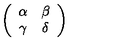

In [92]:
sample["image"]

In [93]:
sample["messages"]

[{'content': [{'image': None,
    'text': 'Write the LaTeX representation for this image.',
    'type': 'text'},
   {'image': {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00x\x00\x00\x002\x08\x02\x00\x00\x00\x18\xc5\x88\x8f\x00\x00\x08\x90IDATx\x9c\xed[KL\x13\xdf\x17>s\xa7O\x86\x80Hb\xd4\xb8\x80\xf8\x08F\x83\x81\x82\xe1Q\xd4\xfa\xe0\x11\tjB\xdc\x117\x98\x18\xca\xc6h\x90\x85DH\x8c1F$\x1aW\xc6\xc4\x18\xa3+\x93\x82\x82\x80J\x11\xad\xc4\xa8\x1bq!nt\xa5,\xa4\xa5\xef\xd2vf\xce\x7fq\xa4\xf2j;\xf5\x8f\xa5\xfd\x85o\xd5\xcc\xcc\xbd\xe7\xde\xef\x9e{^\xf7\x96CDX\xc3\xbf\x07\x8b\xfd:\xa5\x96\x01\x11Sj<\t!\x16\xd1\x92$q\x1c\x97\xb4\xa1\xc4\x05\xc7q\x1c\xc7\xa5)\xd7Q\x89\x96$\x89\xe7y\x8f\xc7333\x03IQmI\x92\xc2\xe1\xb0$I\xd1>\xf0\xf9|\x00\x90\xa6\\/O4\xb1\xfc\xe4\xc9\x93\x8d\x1b7~\xfe\xfc\x19\x11eY\xfe\xd7C\xe1y^\xadV\xf3<\xbfTV8\x1c\x06\x80\xee\xeen\x83\xc1\x00ijCp\tDQ\x94$i``\x80\xe38\x8b\xc5BO\x96~\xb6R\x90e\x99~X,\x16\xb3\xd9\xdc\xdf\xdf\x8f\x88\x92$-\xfaF\x92$\xaf\xd7[^^n4\x1aeY\x0e\

In [94]:
from unsloth.chat_templates import get_chat_template
tokenizer = get_chat_template(
    tokenizer,
    chat_template = "gemma-3",
)
messages = [{
    "role": "user",
    "content": [
        {
            "type": "image",
            "image": sample["image"]

        },
        {
        "type" : "text",
        "text" : "Write the LaTeX representation for this image",
    }]
}]
text = tokenizer.apply_chat_template(
    messages,
    add_generation_prompt = True, # Must add for generation
)
outputs = model.generate(
    **tokenizer([text], return_tensors = "pt").to("cuda"),
    max_new_tokens = 64, # Increase for longer outputs!
    # Recommended Gemma-3 settings!
    temperature = 1.0, top_p = 0.95, top_k = 64,
)
tokenizer.batch_decode(outputs)

['<bos><start_of_turn>user\n<start_of_image>Write the LaTeX representation for this image<end_of_turn>\n<start_of_turn>model\n\\eta _ { \\mu \\nu } = \\frac { 1 } { 2 } \\left( \\eta ^ { \\mu \\nu } + \\eta ^ { \\nu \\mu } \\right)<end_of_turn>']

In [95]:
sample["text"]

'\\left( \\begin{array} { c c } { \\alpha } & { \\beta } \\\\ { \\gamma } & { \\delta } \\\\ \\end{array} \\right)'

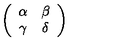

In [96]:
sample["image"]

 You can also use a `TextStreamer` for continuous inference - so you can see the generation token by token, instead of waiting the whole time!

In [60]:
messages = [{
    "role": "user",
    "content": [{"type" : "text", "text" : "Why is the sky blue?",}]
}]
text = tokenizer.apply_chat_template(
    messages,
    add_generation_prompt = True, # Must add for generation
)

from transformers import TextStreamer
_ = model.generate(
    **tokenizer([text], return_tensors = "pt").to("cuda"),
    max_new_tokens = 64, # Increase for longer outputs!
    # Recommended Gemma-3 settings!
    temperature = 1.0, top_p = 0.95, top_k = 64,
    streamer = TextStreamer(tokenizer, skip_prompt = True),
)

Okay, let's break down why the sky is blue! It's a fascinating phenomenon that has to do with how light interacts with the atmosphere. Here's the explanation:

**1. Sunlight and its Colors:**

* **White Light:** Sunlight actually isn't just one color. It's


<a name="Save"></a>
### Saving, loading finetuned models
To save the final model as LoRA adapters, either use Huggingface's `push_to_hub` for an online save or `save_pretrained` for a local save.

**[NOTE]** This ONLY saves the LoRA adapters, and not the full model. To save to 16bit or GGUF, scroll down!

In [ ]:
model.save_pretrained("gemma-3")  # Local saving
tokenizer.save_pretrained("gemma-3")
# model.push_to_hub("HF_ACCOUNT/gemma-3", token = "...") # Online saving
# tokenizer.push_to_hub("HF_ACCOUNT/gemma-3", token = "...") # Online saving

['gemma-3/processor_config.json']

Now if you want to load the LoRA adapters we just saved for inference, set `False` to `True`:

In [ ]:
if False:
    from unsloth import FastModel
    model, tokenizer = FastModel.from_pretrained(
        model_name = "lora_model", # YOUR MODEL YOU USED FOR TRAINING
        max_seq_length = 2048,
        load_in_4bit = True,
    )

messages = [{
    "role": "user",
    "content": [{"type" : "text", "text" : "What is Gemma-3?",}]
}]
text = tokenizer.apply_chat_template(
    messages,
    add_generation_prompt = True, # Must add for generation
)

from transformers import TextStreamer
_ = model.generate(
    **tokenizer([text], return_tensors = "pt").to("cuda"),
    max_new_tokens = 64, # Increase for longer outputs!
    # Recommended Gemma-3 settings!
    temperature = 1.0, top_p = 0.95, top_k = 64,
    streamer = TextStreamer(tokenizer, skip_prompt = True),
)

Gemma-3 is a family of open-source language models developed by the team at Google DeepMind. They are based on the same architecture as the previous Gemma models, but with a larger context window and improved performance. Gemma-3 models are available in various sizes, from 2B to 7B parameters


### Saving to float16 for VLLM

We also support saving to `float16` directly for deployment! We save it in the folder `gemma-3-finetune`. Set `if False` to `if True` to let it run!

In [ ]:
if False: # Change to True to save finetune!
    model.save_pretrained_merged("gemma-3-finetune", tokenizer)

If you want to upload / push to your Hugging Face account, set `if False` to `if True` and add your Hugging Face token and upload location!

In [ ]:
if False: # Change to True to upload finetune
    model.push_to_hub_merged(
        "HF_ACCOUNT/gemma-3-finetune", tokenizer,
        token = "hf_..."
    )

### GGUF / llama.cpp Conversion
To save to `GGUF` / `llama.cpp`, we support it natively now for all models! For now, you can convert easily to `Q8_0, F16 or BF16` precision. `Q4_K_M` for 4bit will come later!

In [ ]:
if False: # Change to True to save to GGUF
    model.save_pretrained_gguf(
        "gemma-3-finetune",
        quantization_type = "Q8_0", # For now only Q8_0, BF16, F16 supported
    )

Likewise, if you want to instead push to GGUF to your Hugging Face account, set `if False` to `if True` and add your Hugging Face token and upload location!

In [ ]:
if False: # Change to True to upload GGUF
    model.push_to_hub_gguf(
        "gemma-3-finetune",
        quantization_type = "Q8_0", # Only Q8_0, BF16, F16 supported
        repo_id = "HF_ACCOUNT/gemma-finetune-gguf",
        token = "hf_...",
    )

Now, use the `gemma-3-finetune.gguf` file or `gemma-3-finetune-Q4_K_M.gguf` file in llama.cpp or a UI based system like Jan or Open WebUI. You can install Jan [here](https://github.com/janhq/jan) and Open WebUI [here](https://github.com/open-webui/open-webui)

And we're done! If you have any questions on Unsloth, we have a [Discord](https://discord.gg/unsloth) channel! If you find any bugs or want to keep updated with the latest LLM stuff, or need help, join projects etc, feel free to join our Discord!

Some other links:
1. Train your own reasoning model - Llama GRPO notebook [Free Colab](https://colab.research.google.com/github/unslothai/notebooks/blob/main/nb/Llama3.1_(8B)-GRPO.ipynb)
2. Saving finetunes to Ollama. [Free notebook](https://colab.research.google.com/github/unslothai/notebooks/blob/main/nb/Llama3_(8B)-Ollama.ipynb)
3. Llama 3.2 Vision finetuning - Radiography use case. [Free Colab](https://colab.research.google.com/github/unslothai/notebooks/blob/main/nb/Llama3.2_(11B)-Vision.ipynb)
6. See notebooks for DPO, ORPO, Continued pretraining, conversational finetuning and more on our [documentation](https://docs.unsloth.ai/get-started/unsloth-notebooks)!

<div class="align-center">
  <a href="https://unsloth.ai"><img src="https://github.com/unslothai/unsloth/raw/main/images/unsloth%20new%20logo.png" width="115"></a>
  <a href="https://discord.gg/unsloth"><img src="https://github.com/unslothai/unsloth/raw/main/images/Discord.png" width="145"></a>
  <a href="https://docs.unsloth.ai/"><img src="https://github.com/unslothai/unsloth/blob/main/images/documentation%20green%20button.png?raw=true" width="125"></a>

  Join Discord if you need help + ⭐️ <i>Star us on <a href="https://github.com/unslothai/unsloth">Github</a> </i> ⭐️
</div>
